In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pickle
from transform_attention_weights_lib import transform_attention_weights
from aggregation_sentence_information_lib import aggregate_weight_information_for_sentences

from visualize_attention_weights import *
%matplotlib inline

In [2]:
arne=False
if arne:
    weights = np.load(r"E:\graphsum\data\attention_weights_with_meta_information\pretrained_attention_weights.npy")
    parent_idx = np.load(r"E:\graphsum\data\attention_weights_with_meta_information\parent_idx.npy")
    scores = np.load(r"E:\graphsum\data\attention_weights_with_meta_information\scores.npy")
    result_dict = pickle.load(open(r"E:\graphsum\data\attention_weights_with_meta_information\save_dict" ,"rb"))
else:
    weights = np.load("./data/attention_weights/pretrained_attention_weights.npy")
    parent_idx = np.load("./data/attention_weights/parent_idx.npy")
    scores = np.load("./data/attention_weights/scores.npy")
    result_dict = pickle.load(open("./data/attention_weights/save_dict" ,"rb"))

finished_scores_array = result_dict["scores_array"]

In [3]:
result_dict.keys()

dict_keys(['longest_beam_array', 'summary_beam_list', 'number_of_textual_units', 'scores_array', 'token_beam_array', 'beam_length'])

In [4]:
cleaned_weight_matrix, cleaned_score_matrix = transform_attention_weights(weights, parent_idx, scores, result_dict)

In [5]:
r = aggregate_weight_information_for_sentences(cleaned_weight_matrix, result_dict)

/Users/lautarohickmann/OneDrive - bwedu/Uni/GNN/GBTBMDS/aggregation_sentence_information_lib.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sentences_ending_information = np.array([np.append(np.insert(np.where(beam == eoq_token), 0, 0, axis=1).reshape(-1,), [


In [6]:
r["Mean"][1,:,:,0,0,:10]

array([[[0.0805293 , 0.08564394, 0.06917164, 0.06307391, 0.04275826,
         0.04215735, 0.05213131, 0.03303247, 0.03084569, 0.05233949],
        [0.07807299, 0.06034666, 0.08435677, 0.06087342, 0.032836  ,
         0.04044218, 0.05458871, 0.02769563, 0.027351  , 0.06220106],
        [0.06065328, 0.04569869, 0.09207353, 0.05369191, 0.03954623,
         0.03849616, 0.05676437, 0.03738576, 0.03351049, 0.06680411],
        [0.06207975, 0.04221972, 0.10004984, 0.05991317, 0.04220194,
         0.03785561, 0.05884672, 0.04604529, 0.03988005, 0.07587005],
        [0.06440912, 0.04269555, 0.0934148 , 0.05628587, 0.0407111 ,
         0.04584856, 0.06654776, 0.05895969, 0.04680609, 0.08382408],
        [0.0579781 , 0.06126981, 0.07559783, 0.05771615, 0.05154164,
         0.05335989, 0.07587404, 0.06525973, 0.05511072, 0.07404803],
        [0.06398449, 0.06395058, 0.07099767, 0.05916622, 0.04912377,
         0.05164787, 0.0712564 , 0.06805124, 0.06867141, 0.07525596],
        [0.05107001, 0.0704

In [7]:
r["Mean"][0,0,11,0,0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
np.argsort(r["Median"], axis=5)[0,0,11,0,:,:]

array([[ 0, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
        12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 28, 29],
       [ 0, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
        12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 28, 29],
       [ 0, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
        12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 28, 29],
       [ 0, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
        12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 28, 29],
       [ 0, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
        12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 28, 29],
       [ 0, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
        12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 28, 29],
       [ 0, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
        12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 28, 29],
       [ 0, 27, 26, 25, 24, 23, 22, 21, 2

In [9]:
np.argsort(r["Mean"], axis=5)[0,0,0,0,:,:]

array([[28, 27, 29, 25, 26, 22, 24, 20, 12, 14,  7,  5, 13, 21, 10, 11,
         9, 23,  6,  8, 17, 19, 18,  4,  2,  3, 16,  1, 15,  0],
       [29, 28, 24, 23, 27, 26, 14, 25,  9, 10, 20, 22, 13,  8, 12, 11,
         5,  7, 21, 17, 18,  6, 16,  2, 19,  1,  3, 15,  4,  0],
       [29, 28, 22, 25, 27, 24, 26,  7, 23, 10, 21, 14,  9, 12, 20, 13,
        11,  8,  5,  6, 17,  2, 19, 18,  4, 16,  1,  3, 15,  0],
       [ 9, 24, 26, 23, 11,  8, 18, 28, 29, 16, 27,  3, 12, 14, 13,  1,
        10, 19, 25,  5,  4, 17, 20,  2, 21,  6,  0, 15,  7, 22],
       [24, 28, 27, 25, 29,  9, 26, 22, 23, 20, 10,  5, 14,  7, 21, 12,
        13, 11,  8,  6, 17, 19,  2, 18,  4, 16,  1,  3, 15,  0],
       [24, 28, 26,  9, 29, 20, 23, 25, 22, 21,  5, 27, 14, 11, 13, 10,
         7,  8, 12,  6, 17, 19, 18, 16,  3, 15,  4,  2,  1,  0],
       [ 5, 25, 10, 20, 22, 21,  7, 29, 23,  6,  3, 14, 18, 19,  4,  8,
        12,  2, 27,  0, 13, 26, 17, 28, 11, 15,  1, 24,  9, 16],
       [25, 22, 20, 27, 10,  5,  7, 28, 2

In [10]:
finished_scores_array[6,:,200:230]

array([[-10.52281475, -10.70556927, -10.83531857, -10.81124306,
        -11.05198669, -11.0454092 , -11.17138195, -11.14888191,
        -11.1265974 , -11.17399883, -11.15557289, -11.12869167,
        -11.12251186, -11.22120476, -11.21485806,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-10.52281475, -10.70556927, -10.83531857, -10.81124306,
        -10.9281435 , -11.00714302, -11.09377861, -11.08160877,
        -11.05364895, -11.02355099, -11.29302406, -11.27489758,
        -11.32563305, -11.43916893, -11.43182278,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-10.52281475, -10.7055

In [11]:
cleaned_score_matrix[6,:,200:230]

array([[-10.52281475, -10.70556927, -10.83531857, -10.81124306,
        -11.05198669, -11.0454092 , -11.17138195, -11.14888191,
        -11.1265974 , -11.17399883, -11.15557289, -11.12869167,
        -11.12251186, -11.22120476, -11.21485806,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-10.52281475, -10.70556927, -10.83531857, -10.81124306,
        -10.9281435 , -11.00714302, -11.09377861, -11.08160877,
        -11.05364895, -11.02355099, -11.29302406, -11.27489758,
        -11.32563305, -11.43916893, -11.43182278,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-10.52281475, -10.7055

In [12]:
finished_scores_array[0,:,200:210]

array([[-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.30475807, -11.43566227,
          0.        ,   0.        ],
       [-11.07377338, -11.05330849, -11.0407095 , -11.18229103,
        -11.3168602 , -11.46519756,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879]])

In [13]:
cleaned_score_matrix[0,:,200:210]

array([[-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.30475807, -11.43566227,
          0.        ,   0.        ],
       [-11.07377338, -11.05330849, -11.0407095 , -11.18229103,
        -11.3168602 , -11.46519756,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879],
       [-11.07377338, -11.05330849, -11.0407095 , -11.21485806,
        -11.19147396, -11.16300678, -11.19817257, -11.23536396,
        -11.25587749, -11.24664879]])

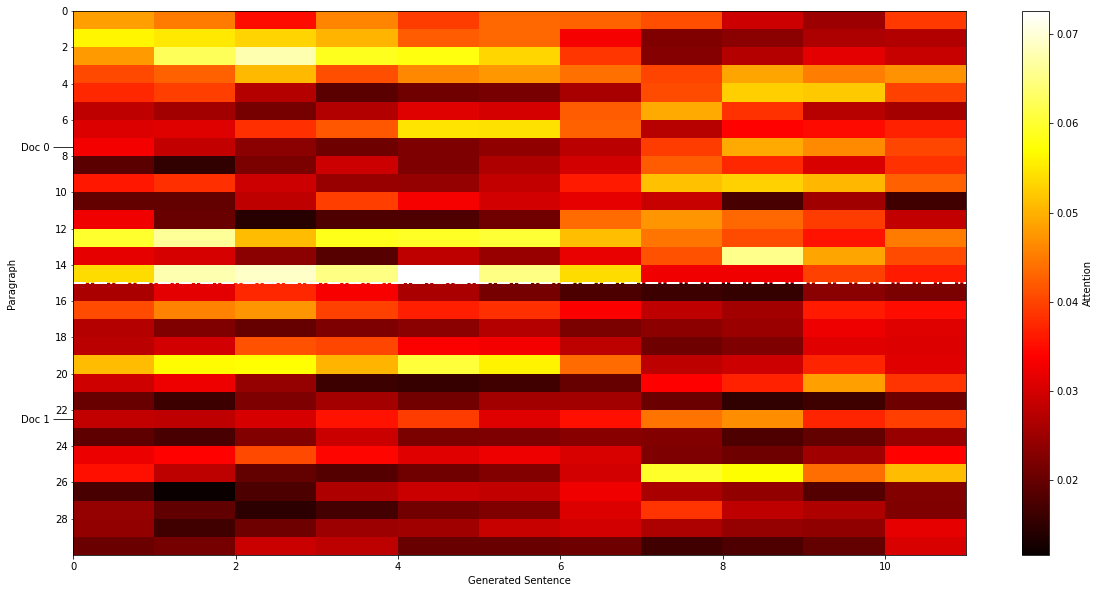

In [14]:
heatmap_sent_simp(result_dict,r["Mean"], example=2, decoding_layer=1)

In [91]:
def generate_histo_mat(result_dict, aggregated_weight_matrix,normalize=False):
    #over all examples, decoding layers and attention heads.
    plot=True
    ax=[]
    num_ex,_,max_sent,num_multi_heads,decoding_layers,max_para= aggregated_weight_matrix.shape
    histo=np.zeros((max_sent,max_para)) # maximal length of sentence times maximal paragraph length
    for example in range(num_ex):
        number_of_textual_units = result_dict["number_of_textual_units"][example]
        text_units = np.cumsum(number_of_textual_units[number_of_textual_units != 0])
        text_units=np.append(0,text_units)
        for decoding_layer in range(decoding_layers):
            for num_multi_head in range(num_multi_heads):
                aux = aggregated_weight_matrix[example, 0, :, decoding_layer, num_multi_head, :]
                aux = aux[:, np.max(aux, axis=0) > 1e-10]
                aux = aux[np.max(aux, axis=1) > 1e-10, :]
                for i in range(len(text_units)-1):
                    for i,x in enumerate(np.argmax(aux[:,text_units[i]:text_units[i+1]], axis=1)):
                        histo[i,x]+=1
    
    #histo=np.vstack((histo, np.argmax(aux[:,text_units[i]:text_units[i+1]], axis=1)))
    histo=histo[:-1,:]
    if normalize:
        histo=histo/histo.max(axis=1)[:, np.newaxis]
    return histo # rows are how often the n-th paragraph of a docuemnt is atended. 
          # Columns represent sentences, 1 first sentence, 2 second .....

In [92]:
def histo_sent_simp(result_dict, aggregated_weight_matrix, normalize=False,plot=True, ax=[]):


    aux= generate_histo_mat(result_dict,aggregated_weight_matrix,normalize)
    # Calculating the output and storing it in the array Z
    
    x = np.arange(0, aux.shape[0], 1)
    y = np.arange(0, aux.shape[1], 1)
    X, Y = np.meshgrid(x, y)

    Z = aux[X, Y]

    if plot:
        fig, ax = plt.subplots(figsize=(20, 10))

    im = ax.imshow(Z, cmap='hot', extent=(0, aux.shape[0], aux.shape[1], 0), aspect='auto')  # , interpolation='bilinear')

    bar = plt.colorbar(im)
    bar.set_label('Occurrences')


    ax.set_ylabel('Paragraph number')
    ax.set_xlabel('Generated Sentence')
    if plot:
        plt.show()
    else:
        return ax

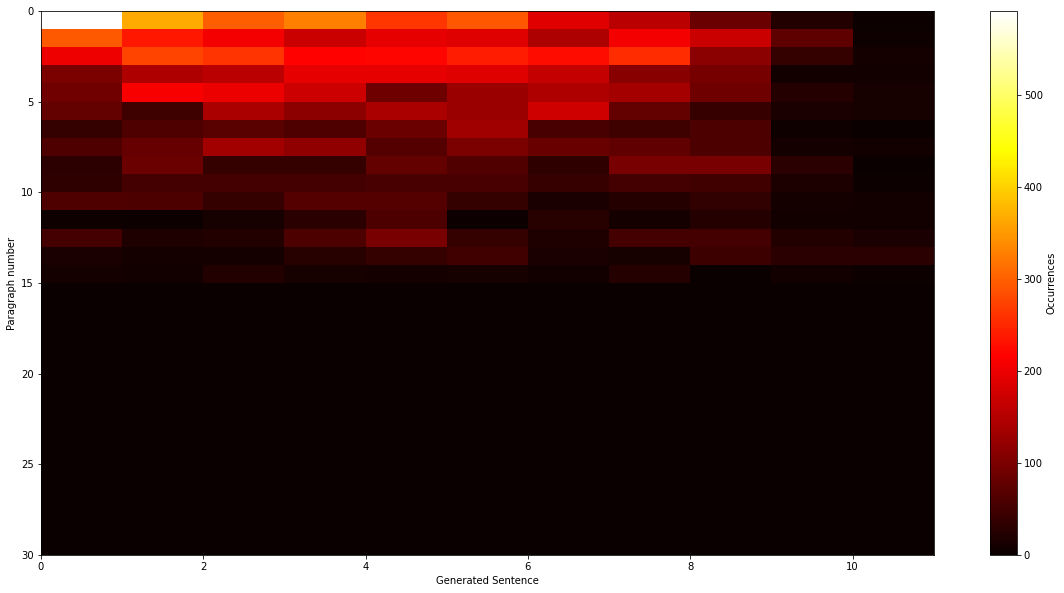

In [93]:
histo_sent_simp(result_dict,r["Median"])

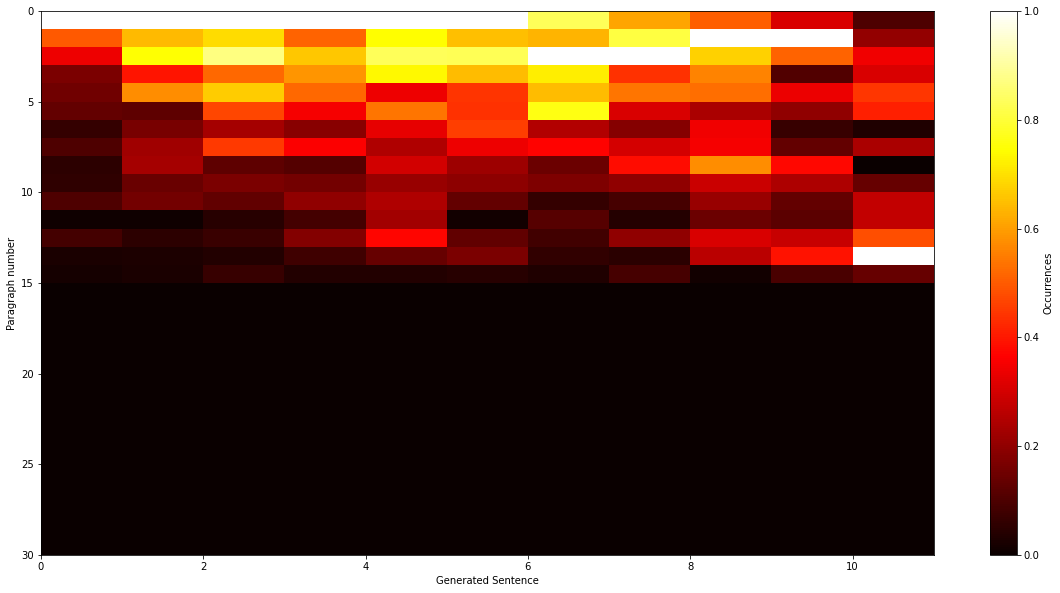

In [95]:
histo_sent_simp(result_dict,r["Median"],True)

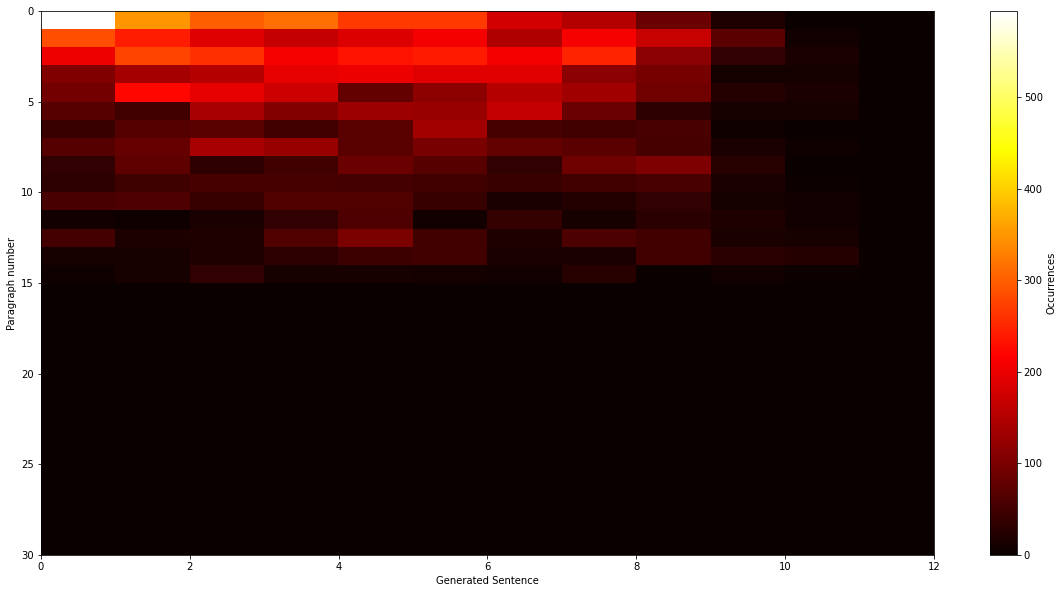

In [57]:
histo_sent_simp(result_dict,r["Mean"])

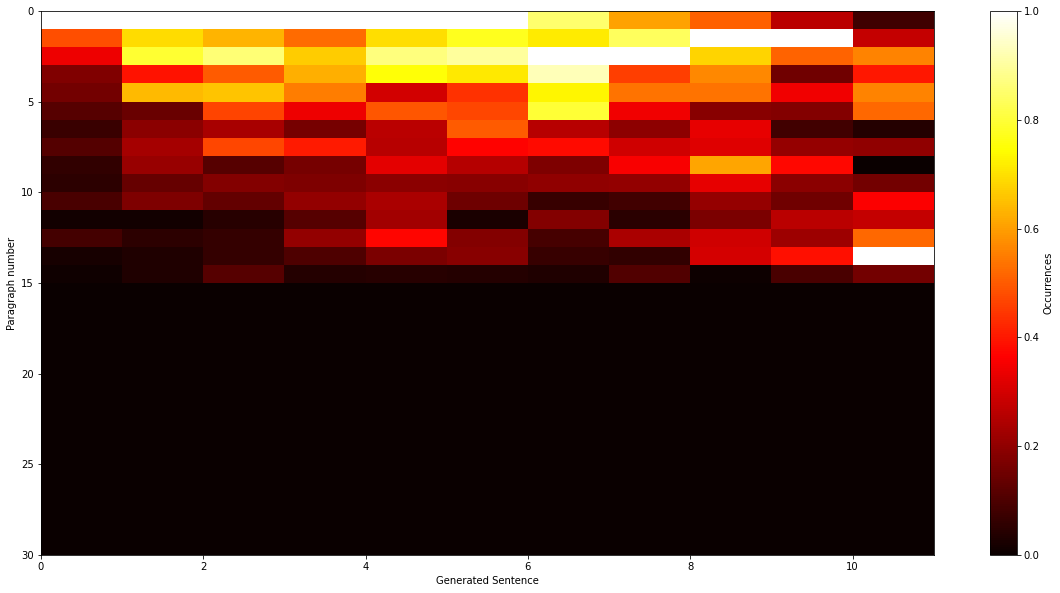

In [97]:
histo_sent_simp(result_dict,r["Mean"],True)

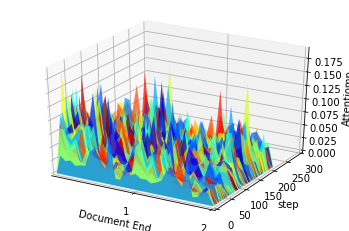

In [15]:
histo_3d_simple(cleaned_weight_matrix, cleaned_score_matrix,result_dict["number_of_textual_units"], (result_dict["longest_beam_array"]-1).astype("int"),decoding_layer=0,example=0)

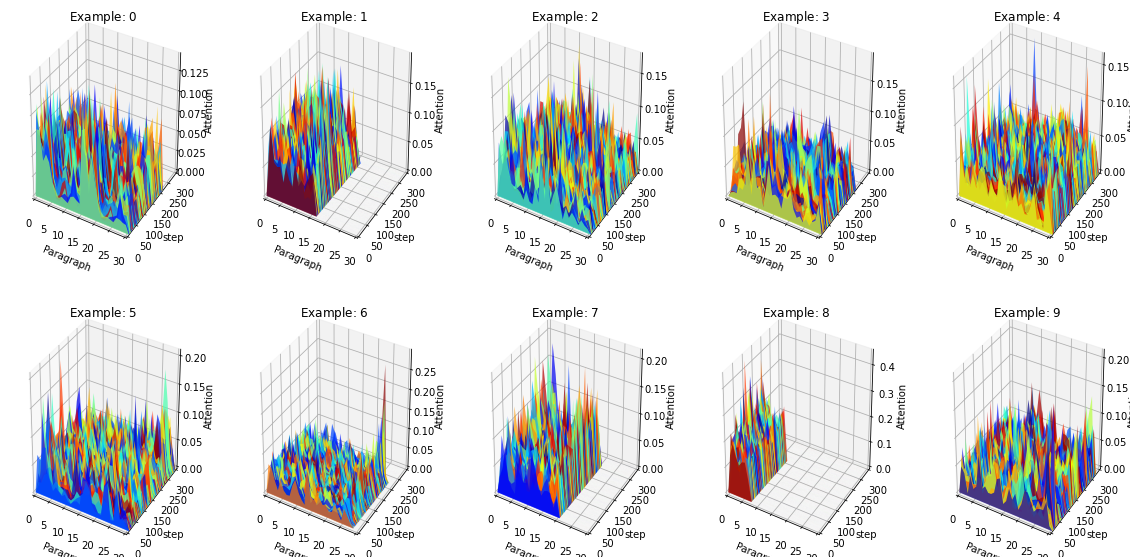

In [16]:
histo_3d_multi(cleaned_weight_matrix, cleaned_score_matrix, (result_dict["longest_beam_array"]-1).astype("int"), decoding_layer=7);

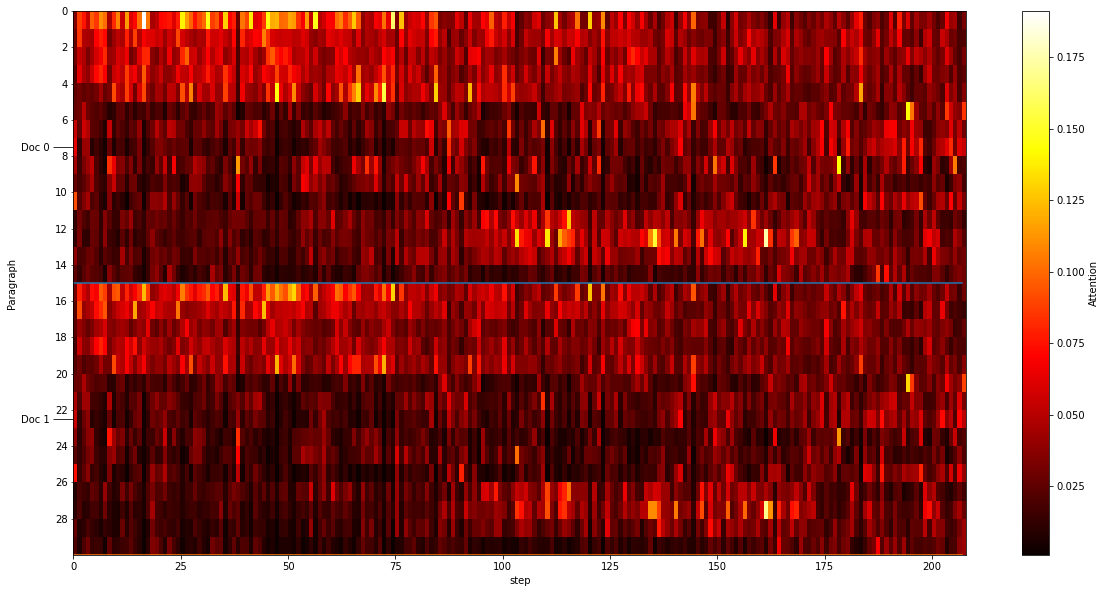

In [17]:
heatmap_simp(result_dict,cleaned_weight_matrix,cleaned_score_matrix, example=0, decoding_layer=0,num_multi_head=0);

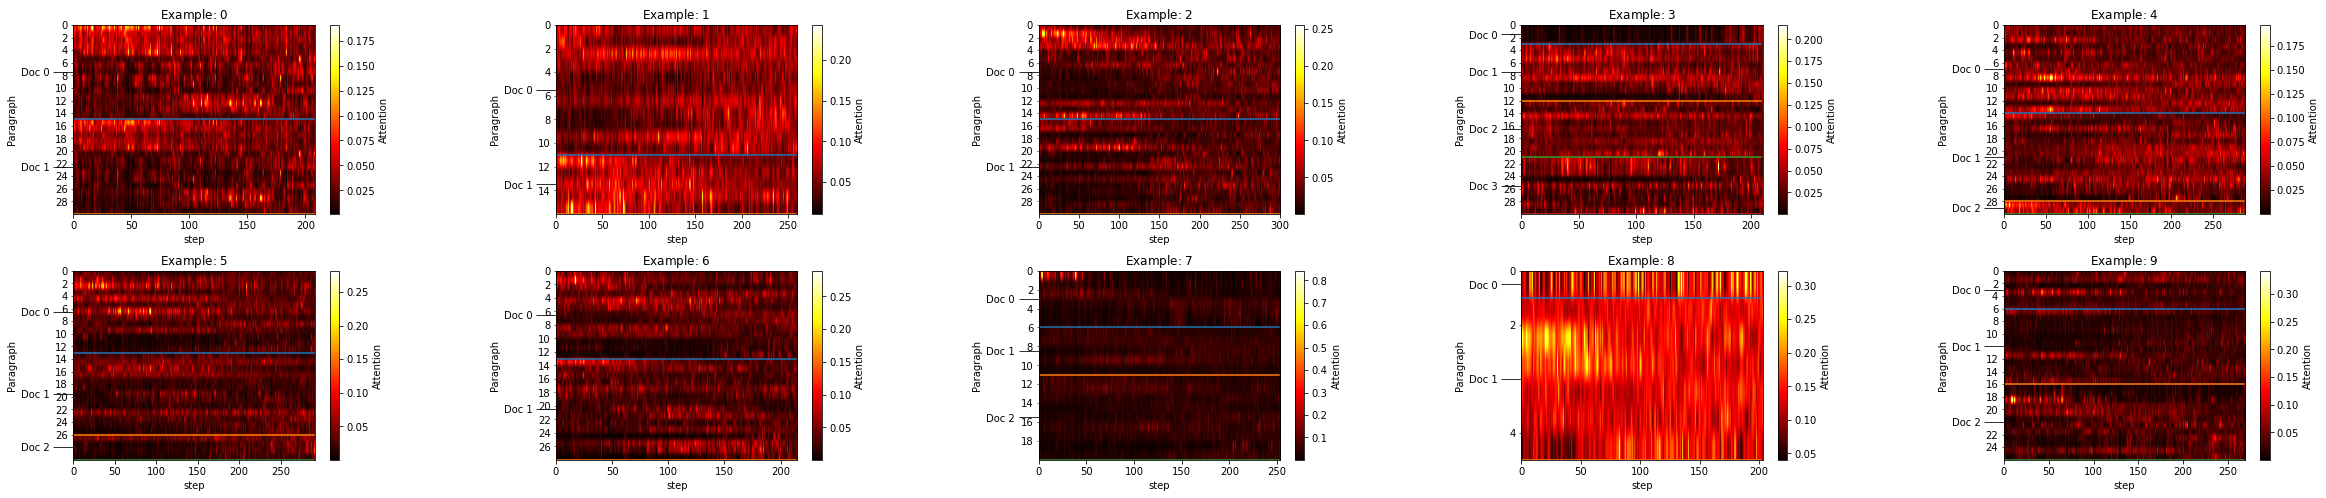

In [18]:
heatmap_multi(result_dict,cleaned_weight_matrix,cleaned_score_matrix, decoding_layer=0,num_multi_head=0, size=(40,8)); # Default values

In [19]:
heatmap_att_head(result_dict,cleaned_weight_matrix,cleaned_score_matrix,example=0, size=(40, 70),save=True)

KeyboardInterrupt: 

In [ ]:
heatmap_dec_layer(result_dict,cleaned_weight_matrix,cleaned_score_matrix,num_multi_head=0, size=(40,70),save=True); # Default values with exeption of save, changing the size could brake the space between subplots

In [ ]:
heatmap_dec_layer(result_dict,cleaned_weight_matrix,cleaned_score_matrix,num_multi_head=1);